# Imports and configs

In [86]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, f_classif, RFE, VarianceThreshold, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import optuna
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from tqdm import tqdm

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', '{:.4f}'.format)

In [3]:
data = pd.read_csv(r'./modelling_data/modelling_data.csv')

In [5]:
data.head()

,home_team_cumulative_goals_scored_pre_game,away_team_cumulative_goals_scored_pre_game,home_team_cumulative_goals_conceded_pre_game,away_team_cumulative_goals_conceded_pre_game,home_team_average_goals_scored_per_game_pre_game,away_team_average_goals_scored_per_game_pre_game,home_team_average_goals_conceded_per_game_pre_game,away_team_average_goals_conceded_per_game_pre_game,home_team_average_first_half_goals_scored_pre_game,home_team_average_second_half_goals_scored_pre_game,away_team_average_first_half_goals_scored_pre_game,away_team_average_second_half_goals_scored_pre_game,home_team_average_first_half_goals_conceded_pre_game,home_team_average_second_half_goals_conceded_pre_game,away_team_average_first_half_goals_conceded_pre_game,away_team_average_second_half_goals_conceded_pre_game,home_team_average_first_half_goals_total_pre_game,home_team_average_second_half_goals_total_pre_game,away_team_average_first_half_goals_total_pre_game,away_team_average_second_half_goals_total_pre_game,home_team_average_corners_total_per_game_pre_game,away_team_average_corners_total_per_game_pre_game,home_team_average_corners_per_game_pre_game,away_team_average_corners_per_game_pre_game,home_team_average_yellow_cards_total_per_game_pre_game,away_team_average_yellow_cards_total_per_game_pre_game,home_team_average_yellow_cards_per_game_pre_game,away_team_average_yellow_cards_per_game_pre_game,home_team_cumulative_red_cards_pre_game,away_team_cumulative_red_cards_pre_game,home_team_average_red_cards_total_per_game_pre_game,away_team_average_red_cards_total_per_game_pre_game,home_team_average_red_cards_per_game_pre_game,away_team_average_red_cards_per_game_pre_game,home_team_average_shots_per_game_pre_game,home_team_average_shots_on_target_per_game_pre_game,away_team_average_shots_per_game_pre_game,away_team_average_shots_on_target_per_game_pre_game,home_team_average_fouls_per_game_pre_game,away_team_average_fouls_per_game_pre_game,home_team_average_fouls_total_per_game_pre_game,away_team_average_fouls_total_per_game_pre_game,home_team_average_possession_per_game_pre_game,away_team_average_possession_per_game_pre_game,home_team_average_xg_per_game_pre_game,away_team_average_xg_per_game_pre_game,home_team_games_without_goals_pre_game,away_team_games_without_goals_pre_game,home_team_cumulative_btts_pre_game,away_team_cumulative_btts_pre_game,home_team_cumulative_clean_sheets_pre_game,away_team_cumulative_clean_sheets_pre_game,home_team_cumulative_wins_pre_game,home_team_cumulative_draws_pre_game,home_team_cumulative_losses_pre_game,away_team_cumulative_wins_pre_game,away_team_cumulative_draws_pre_game,away_team_cumulative_losses_pre_game,home_team_average_points_per_game_pre_game,away_team_average_points_per_game_pre_game,home_team_wins_in_last_5_games,home_team_draws_in_last_5_games,home_team_losses_in_last_5_games,away_team_wins_in_last_5_games,away_team_draws_in_last_5_games,away_team_losses_in_last_5_games,home_team_average_goals_scored_in_last_5_games,away_team_average_goals_scored_in_last_5_games,home_team_average_goals_conceded_in_last_5_games,away_team_average_goals_conceded_in_last_5_games,average_total_corners_in_home_team_games_in_last_5_games,average_total_corners_in_away_team_games_in_last_5_games,average_corners_by_home_team_in_last_5_games,average_corners_by_away_team_in_last_5_games,average_yellow_cards_by_home_team_in_last_5_games,average_yellow_cards_by_away_team_in_last_5_games,average_red_cards_by_home_team_in_last_5_games,average_red_cards_by_away_team_in_last_5_games,average_ball_possession_by_home_team_in_last_5_games,average_ball_possession_by_away_team_in_last_5_games,average_xg_by_home_team_in_last_5_games,average_xg_by_away_team_in_last_5_games,average_shots_by_home_team_in_last_5_games,average_shots_by_away_team_in_last_5_games,average_shots_on_target_by_home_team_in_last_5_games,average_shots_on_target_by_away_team_in_last_5_games,average_total_fouls_in_home_team_games_in_last_5_games,average_total_fouls_in_away_team_games

# Basic data glimpse

In [5]:
data.shape

(34369, 116)

In [6]:
data.head()

,home_team_cumulative_goals_scored_pre_game,away_team_cumulative_goals_scored_pre_game,home_team_cumulative_goals_conceded_pre_game,away_team_cumulative_goals_conceded_pre_game,home_team_average_goals_scored_per_game_pre_game,away_team_average_goals_scored_per_game_pre_game,home_team_average_goals_conceded_per_game_pre_game,away_team_average_goals_conceded_per_game_pre_game,home_team_average_first_half_goals_scored_pre_game,home_team_average_second_half_goals_scored_pre_game,away_team_average_first_half_goals_scored_pre_game,away_team_average_second_half_goals_scored_pre_game,home_team_average_first_half_goals_conceded_pre_game,home_team_average_second_half_goals_conceded_pre_game,away_team_average_first_half_goals_conceded_pre_game,away_team_average_second_half_goals_conceded_pre_game,home_team_average_first_half_goals_total_pre_game,home_team_average_second_half_goals_total_pre_game,away_team_average_first_half_goals_total_pre_game,away_team_average_second_half_goals_total_pre_game,home_team_average_corners_total_per_game_pre_game,away_team_average_corners_total_per_game_pre_game,home_team_average_corners_per_game_pre_game,away_team_average_corners_per_game_pre_game,home_team_average_yellow_cards_total_per_game_pre_game,away_team_average_yellow_cards_total_per_game_pre_game,home_team_average_yellow_cards_per_game_pre_game,away_team_average_yellow_cards_per_game_pre_game,home_team_cumulative_red_cards_pre_game,away_team_cumulative_red_cards_pre_game,home_team_average_red_cards_total_per_game_pre_game,away_team_average_red_cards_total_per_game_pre_game,home_team_average_red_cards_per_game_pre_game,away_team_average_red_cards_per_game_pre_game,home_team_average_shots_per_game_pre_game,home_team_average_shots_on_target_per_game_pre_game,away_team_average_shots_per_game_pre_game,away_team_average_shots_on_target_per_game_pre_game,home_team_average_fouls_per_game_pre_game,away_team_average_fouls_per_game_pre_game,home_team_average_fouls_total_per_game_pre_game,away_team_average_fouls_total_per_game_pre_game,home_team_average_possession_per_game_pre_game,away_team_average_possession_per_game_pre_game,home_team_average_xg_per_game_pre_game,away_team_average_xg_per_game_pre_game,home_team_games_without_goals_pre_game,away_team_games_without_goals_pre_game,home_team_cumulative_btts_pre_game,away_team_cumulative_btts_pre_game,home_team_cumulative_clean_sheets_pre_game,away_team_cumulative_clean_sheets_pre_game,home_team_cumulative_wins_pre_game,home_team_cumulative_draws_pre_game,home_team_cumulative_losses_pre_game,away_team_cumulative_wins_pre_game,away_team_cumulative_draws_pre_game,away_team_cumulative_losses_pre_game,home_team_average_points_per_game_pre_game,away_team_average_points_per_game_pre_game,home_team_wins_in_last_5_games,home_team_draws_in_last_5_games,home_team_losses_in_last_5_games,away_team_wins_in_last_5_games,away_team_draws_in_last_5_games,away_team_losses_in_last_5_games,home_team_average_goals_scored_in_last_5_games,away_team_average_goals_scored_in_last_5_games,home_team_average_goals_conceded_in_last_5_games,away_team_average_goals_conceded_in_last_5_games,average_total_corners_in_home_team_games_in_last_5_games,average_total_corners_in_away_team_games_in_last_5_games,average_corners_by_home_team_in_last_5_games,average_corners_by_away_team_in_last_5_games,average_yellow_cards_by_home_team_in_last_5_games,average_yellow_cards_by_away_team_in_last_5_games,average_red_cards_by_home_team_in_last_5_games,average_red_cards_by_away_team_in_last_5_games,average_ball_possession_by_home_team_in_last_5_games,average_ball_possession_by_away_team_in_last_5_games,average_xg_by_home_team_in_last_5_games,average_xg_by_away_team_in_last_5_games,average_shots_by_home_team_in_last_5_games,average_shots_by_away_team_in_last_5_games,average_shots_on_target_by_home_team_in_last_5_games,average_shots_on_target_by_away_team_in_last_5_games,average_total_fouls_in_home_team_games_in_last_5_games,average_total_fouls_in_away_team_games

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37339 entries, 0 to 37338
Columns: 170 entries, attendance to average_draw_odds_by_away_team_in_last_5_games
dtypes: float64(113), int64(51), object(6)
memory usage: 48.4+ MB


In [7]:
data.groupby(['league', 'season']).apply(lambda x: x['game_week'].isna().sum())

league              season
austria             18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
belgium pro league  18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
bundesliga          18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
czech first league  18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
denmark             18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
ekstraklasa  

In [8]:
data.dtypes

attendance                                                  float64
home_team_name                                               object
away_team_name                                               object
game_week                                                   float64
home_team_goal_count                                          int64
away_team_goal_count                                          int64
total_goal_count                                              int64
total_goals_at_half_time                                      int64
home_team_goal_count_half_time                                int64
away_team_goal_count_half_time                                int64
home_team_corner_count                                        int64
away_team_corner_count                                        int64
home_team_yellow_cards                                        int64
home_team_red_cards                                           int64
away_team_yellow_cards                          

# Result prediction

## Data preparation

In [107]:
selected_features = [
       'odds_ft_home_team_win', 
       'odds_ft_away_team_win', 
       'odds_ft_draw',
       'average_xg_by_home_team_in_last_5_games',
       # 'away_team_cumulative_losses_pre_game',
       # 'home_team_cumulative_btts_pre_game',
       # 'away_team_cumulative_draws_pre_game',
       # 'home_team_cumulative_wins_pre_game',
       # 'home_team_cumulative_losses_pre_game',
       # 'home_team_cumulative_draws_pre_game',
       'home_team_average_xg_per_game_pre_game',
       'away_team_average_goals_conceded_per_game_pre_game',
       'average_shots_by_home_team_in_last_5_games',
       'away_team_average_xg_per_game_pre_game',
       'away_team_average_points_per_game_pre_game',
       'average_total_fouls_in_away_team_games_in_last_5_games',
       'average_fouls_by_away_team_in_last_5_games',
       'home_team_average_fouls_per_game_pre_game',
       # 'away_team_cumulative_goals_conceded_pre_game',
       'home_team_average_fouls_total_per_game_pre_game',
       'home_team_average_shots_per_game_pre_game',
       'away_team_average_corners_per_game_pre_game',
       'average_total_fouls_in_home_team_games_in_last_5_games',
       'odds_btts_yes', 'average_xg_by_away_team_in_last_5_games',
       # 'away_team_cumulative_goals_scored_pre_game',
       'away_team_average_shots_on_target_per_game_pre_game',
       'home_team_average_goals_conceded_per_game_pre_game',
       # 'home_team_cumulative_clean_sheets_pre_game',
       'average_fouls_by_home_team_in_last_5_games',
       'season', 'result', 'league', 'date']

In [108]:
len(selected_features)

25

In [109]:
modelling_data = data[selected_features]

In [110]:
columns_to_scale = modelling_data.columns.difference(['result', 'season', 'league', 'date'])

In [111]:
modelling_data[columns_to_scale] = RobustScaler().fit_transform(modelling_data[columns_to_scale])

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_39344\3584175364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelling_data[columns_to_scale] = RobustScaler().fit_transform(modelling_data[columns_to_scale])


In [112]:
modelling_data.head()

,odds_ft_home_team_win,odds_ft_away_team_win,odds_ft_draw,average_xg_by_home_team_in_last_5_games,home_team_average_xg_per_game_pre_game,away_team_average_goals_conceded_per_game_pre_game,average_shots_by_home_team_in_last_5_games,away_team_average_xg_per_game_pre_game,away_team_average_points_per_game_pre_game,average_total_fouls_in_away_team_games_in_last_5_games,average_fouls_by_away_team_in_last_5_games,home_team_average_fouls_per_game_pre_game,home_team_average_fouls_total_per_game_pre_game,home_team_average_shots_per_game_pre_game,away_team_average_corners_per_game_pre_game,average_total_fouls_in_home_team_games_in_last_5_games,odds_btts_yes,average_xg_by_away_team_in_last_5_games,away_team_average_shots_on_target_per_game_pre_game,home_team_average_goals_conceded_per_game_pre_game,average_fouls_by_home_team_in_last_5_games,season,result,league,date
0,-0.5641,1.1591,0.8000,-3.3768,-4.0871,-2.0952,-2.8500,-4.0663,-1.8640,-3.8710,-3.1579,-3.6923,-4.2709,-3.4909,-3.3440,-3.8400,0.2222,-3.4192,-3.3540,-2.0606,-3.1579,18/19,1,austria,27.07.2018
1,-0.6068,1.3864,0.9333,-3.3768,-4.0871,-2.0952,-2.8500,-4.0663,-1.8640,-3.8710,-3.1579,-3.6923,-4.2709,-3.4909,-3.3440,-3.8400,0.6667,-3.4192,-3.3540,-2.0606,-3.1579,18/19,1,austria,28.07.2018
2,0.1282,-0.0909,-0.4000,-3.3768,-4.0871,-2.0952,-2.8500,-4.0663,-1.8640,-3.8710,-3.1579,-3.6923,-4.2709,-3.4909,-3.3440,-3.8400,0.3704,-3.4192,-3.3540,-2.0606,-3.1579,18/19,2,austria,28.07.2018
3,-0.6496,1.7273,0.9333,-3.3768,-4.0871,-2.0952,-2.8500,-4.0663,-1.8640,-3.8710,-3.1579,-3.6923,-4.2709,-3.4909,-3.3440,-3.8400,1.2222,-3.4192,-3.3540,-2.0606,-3.1579,18/19,1,austria,29.07.2018
4,3.6325,-0.8045,1.4000,-3.3768,-4.0871,-2.0952,-2.8500,-4.0663,-1.8640,-3.8710,-3.1579,-3.6923,-4.2709,-3.4909,-3.3440,-3.8400,0.0000,-3.4192,-3.3540,-2.0606,-3.1579,18/19,2,austria,29.07.2018


In [113]:
train_data = modelling_data[~modelling_data['season'].isin(['23/24', '24/24'])]
test_data = modelling_data[modelling_data['season'].isin(['23/24', '24/24'])]

In [114]:
train_data.season.value_counts()

season
21/22    5442
22/23    5388
20/21    5308
18/19    4692
19/20    4654
23/23     761
22/22     728
21/21     710
19/19     635
20/20     560
Name: count, dtype: int64

In [115]:
test_data.season.value_counts()

season
23/24    5165
24/24     326
Name: count, dtype: int64

In [116]:
X_train = train_data.drop(['season', 'result'], axis=1)
y_train = train_data['result']

In [117]:
X_test = test_data.drop(['season', 'result'], axis=1)
y_test = test_data['result']

## Random forest

### Base

In [56]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

In [57]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [58]:
y_pred = rf_model.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.03      0.07      1951
           1       0.53      0.90      0.67      3268
           2       0.57      0.47      0.52      2249

    accuracy                           0.54      7468
   macro avg       0.66      0.47      0.42      7468
weighted avg       0.63      0.54      0.46      7468



### Hyperparameters tuning with optuna

In [168]:
def objective(trial):
    # Number of trees in random forest
    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial.suggest_categorical(name="max_features", choices=['sqrt', 'log2', None]) 

    # Maximum number of levels in tree
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    
    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf
    }
    model = RandomForestClassifier(random_state=42, **params)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # cv_score = cross_val_score(model, X_train, y_train, n_jobs=4, cv=5)
    # mean_cv_accuracy = cv_score.mean()
    return acc

In [169]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-07-13 16:38:31,007] A new study created in memory with name: no-name-8088fcba-2a49-4459-9989-09039185b482
[W 2024-07-13 16:40:11,421] Trial 0 failed with parameters: {'n_estimators': 400, 'max_features': None, 'max_depth': 110, 'min_samples_split': 6, 'min_samples_leaf': 3} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\magisterka_env\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Łukasz\AppData\Local\Temp\ipykernel_31148\3511437812.py", line 26, in objective
    model.fit(X_train, y_train)
  File "c:\ProgramData\anaconda3\envs\magisterka_env\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\magisterka_env\Lib\site-packages\sklearn\ensemble\_forest.py

KeyboardInterrupt: 

## XGBoost

In [72]:
# Ustawienia dla XGBoost
params = {
    'max_depth': 3,  # głębokość drzew
    'eta': 0.1,      # współczynnik uczenia
    'objective': 'multi:softprob',  # funkcja straty dla klasyfikacji wieloklasowej
    'num_class': 3   # liczba klas wynikowych
}

# Przekształcenie danych do formatu DMatrix, który jest bardziej efektywny dla XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Trenowanie modelu
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predykcja
y_pred_prob = bst.predict(dtest)
y_pred = np.argmax(y_pred_prob, axis=1)  # Wybieramy klasę z najwyższym prawdopodobieństwem

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji XGBoost: {:.2f}%".format(accuracy * 100))

Dokładność klasyfikacji XGBoost: 52.36%


<Figure size 2000x1600 with 0 Axes>

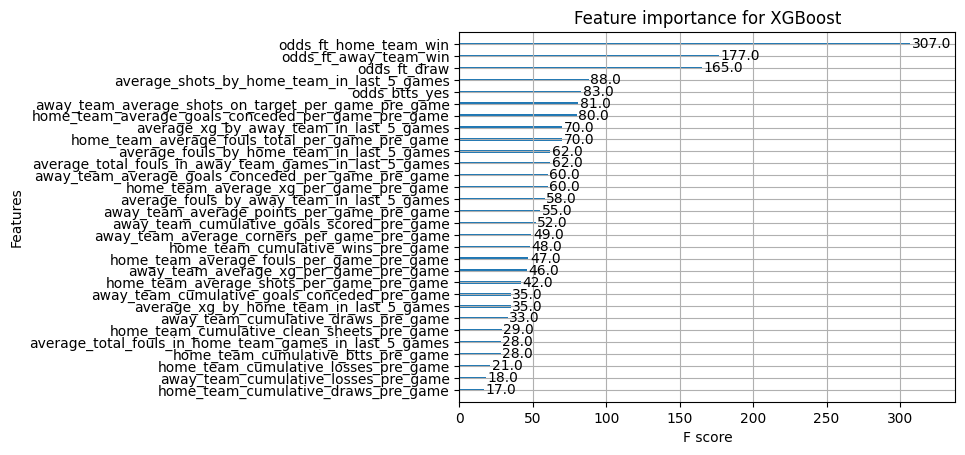

In [23]:
# Ważność cech
plt.figure(figsize=(20,16))
xgb.plot_importance(bst)
plt.title('Feature importance for XGBoost')
plt.show()

### Hyperparameter tuning

In [78]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    #creating datasets in xgb interface
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    params = {
        "objective": "multi:softprob",
        "num_class": "3",
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "gamma": trial.suggest_float("gamma", 0.0, 0.5),
        "lambda": trial.suggest_float("lambda", 1e-5, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-5, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 10.0),
        "num_boost_round": trial.suggest_int("num_boost_round", 100, 1000),
        "early_stopping_rounds": trial.suggest_int("early_stopping_rounds", 10, 100)
    }

    bst = xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_prob = bst.predict(dtest)
    predictions = np.argmax(y_pred_prob, axis=1)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

In [79]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-08-23 17:00:53,445] A new study created in memory with name: no-name-2e6588a5-52a4-4b1c-9f87-43927b6aa520


[I 2024-08-23 17:00:55,264] Trial 0 finished with value: 0.5237661628118739 and parameters: {'learning_rate': 0.0017156756681328857, 'max_depth': 4, 'subsample': 0.2817375515747264, 'colsample_bytree': 0.5187715406565898, 'min_child_weight': 14, 'gamma': 0.275085134655024, 'lambda': 1.0581832099341744e-05, 'alpha': 0.0253464579366763, 'scale_pos_weight': 4.588355988079188, 'num_boost_round': 819, 'early_stopping_rounds': 60}. Best is trial 0 with value: 0.5237661628118739.
[I 2024-08-23 17:00:56,679] Trial 1 finished with value: 0.5244946275723912 and parameters: {'learning_rate': 0.004306523414745789, 'max_depth': 4, 'subsample': 0.6727507532529816, 'colsample_bytree': 0.6358883306048922, 'min_child_weight': 2, 'gamma': 0.33398831682442987, 'lambda': 0.12900544431118607, 'alpha': 2.8510654175500343e-05, 'scale_pos_weight': 2.2419704258001083, 'num_boost_round': 765, 'early_stopping_rounds': 36}. Best is trial 1 with value: 0.5244946275723912.
[I 2024-08-23 17:00:58,793] Trial 2 finish

In [80]:
xgb_optuna_best_params = study.best_params
xgb_optuna_best_acc = study.best_value

In [81]:
xgb_optuna_best_params

{'learning_rate': 0.003401858927721357,
 'max_depth': 7,
 'subsample': 0.3567337932078975,
 'colsample_bytree': 0.5902012935243822,
 'min_child_weight': 12,
 'gamma': 0.28345296285917254,
 'lambda': 0.00737634480153203,
 'alpha': 0.006417083254214992,
 'scale_pos_weight': 3.9502733009775692,
 'num_boost_round': 303,
 'early_stopping_rounds': 45}

In [82]:
xgb_optuna_best_acc

0.5268621380440721

## LightGBM

In [73]:
import lightgbm as lgb

# Ustawienia
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'max_depth': 3,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}

# Trenowanie
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Model
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)

# Predykcja
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Ocena
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji LightGBM: {:.2f}%".format(accuracy * 100))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5003
[LightGBM] [Info] Number of data points in the train set: 28878, number of used features: 21
[LightGBM] [Info] Start training from score -1.377675
[LightGBM] [Info] Start training from score -0.824633
[LightGBM] [Info] Start training from score -1.172992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

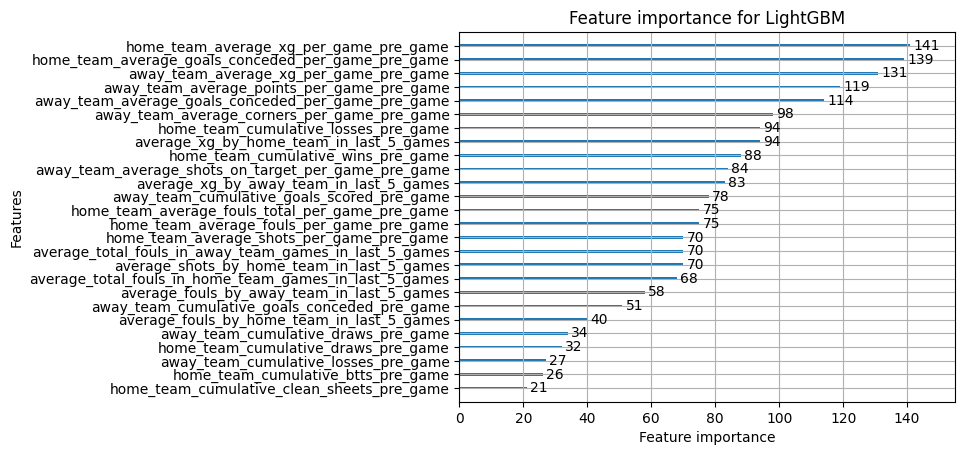

In [62]:
lgb.plot_importance(model, importance_type='split')
plt.title('Feature importance for LightGBM')
plt.show()

### Hyperparameter tuning

In [83]:
def objective(trial):
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'num_class': 3,
        'verbosity': -1,
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.1),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.001, 10.0)

    }

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)

    model = lgb.train(param, train_data, valid_sets=[test_data])

    y_pred = model.predict(X_test)
    predictions = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, predictions)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

lgbm_optuna_best_params = study.best_params
lgbm_optuna_best_acc = study.best_value

In [84]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-08-23 17:05:58,233] A new study created in memory with name: no-name-8d3cab9c-7f8e-443e-a699-b837440f2f89


C:\Users\Łukasz\AppData\Local\Temp\ipykernel_26696\2134813082.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_26696\2134813082.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_26696\2134813082.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.

In [85]:
lgbm_optuna_best_params = study.best_params
lgbm_optuna_best_acc = study.best_value

In [86]:
lgbm_optuna_best_acc

0.5261336732835549

## Catboost

In [74]:
# Inicjalizacja modelu
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='MultiClass',  # dla klasyfikacji wieloklasowej
    verbose=True
)

# Trenowanie modelu
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Predykcja
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji CatBoost: {:.2f}%".format(accuracy * 100))

0:	learn: 1.0787810	test: 1.0790798	best: 1.0790798 (0)	total: 31.1ms	remaining: 31.1s
1:	learn: 1.0620473	test: 1.0620698	best: 1.0620698 (1)	total: 56.6ms	remaining: 28.3s
2:	learn: 1.0486779	test: 1.0479169	best: 1.0479169 (2)	total: 75.3ms	remaining: 25s
3:	learn: 1.0383903	test: 1.0375583	best: 1.0375583 (3)	total: 101ms	remaining: 25.2s
4:	learn: 1.0294525	test: 1.0284979	best: 1.0284979 (4)	total: 123ms	remaining: 24.4s
5:	learn: 1.0218823	test: 1.0205727	best: 1.0205727 (5)	total: 142ms	remaining: 23.5s
6:	learn: 1.0159604	test: 1.0145352	best: 1.0145352 (6)	total: 187ms	remaining: 26.5s
7:	learn: 1.0107747	test: 1.0092042	best: 1.0092042 (7)	total: 222ms	remaining: 27.6s
8:	learn: 1.0060632	test: 1.0043118	best: 1.0043118 (8)	total: 256ms	remaining: 28.2s
9:	learn: 1.0022599	test: 1.0006155	best: 1.0006155 (9)	total: 294ms	remaining: 29.1s
10:	learn: 0.9993089	test: 0.9975404	best: 0.9975404 (10)	total: 312ms	remaining: 28s
11:	learn: 0.9965969	test: 0.9946321	best: 0.9946321 

In [76]:
# Predykcja
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)

In [77]:
accuracy

0.5248588599526498

### Hyperparameter tuning

In [87]:
def objective(trial):
    param = {
        'loss_function': 'MultiClass',
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 5, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'random_state': 42
    }

    model = CatBoostClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False, early_stopping_rounds=100)

    y_pred = model.predict(X_test)    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [88]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-08-23 17:10:27,006] A new study created in memory with name: no-name-b402fafb-1bec-4e6c-863b-6fd3c50db7cc
[I 2024-08-23 17:10:39,082] Trial 0 finished with value: 0.5186669094882536 and parameters: {'iterations': 261, 'learning_rate': 0.12307319173833925, 'depth': 10, 'l2_leaf_reg': 5, 'border_count': 70, 'bagging_temperature': 0.6517129860776782, 'random_strength': 77}. Best is trial 0 with value: 0.5186669094882536.
[I 2024-08-23 17:10:42,921] Trial 1 finished with value: 0.5206701875796759 and parameters: {'iterations': 870, 'learning_rate': 0.06466778679313866, 'depth': 6, 'l2_leaf_reg': 3, 'border_count': 237, 'bagging_temperature': 0.09189506026769967, 'random_strength': 85}. Best is trial 1 with value: 0.5206701875796759.
[I 2024-08-23 17:11:07,001] Trial 2 finished with value: 0.5223092332908396 and parameters: {'iterations': 154, 'learning_rate': 0.04951308212155988, 'depth': 10, 'l2_leaf_reg': 4, 'border_count': 242, 'bagging_temperature': 0.7057612574428512, 'random_

In [89]:
catboost_optuna_best_params = study.best_params
catboost_optuna_best_acc = study.best_value

In [90]:
study.best_value

0.5266800218539428

## Selecting best model

In [91]:
pd.options.display.float_format = '{:,.4f}'.format

In [92]:
pd.DataFrame({
    'xgboost': xgb_optuna_best_acc,
    'lightgbm': lgbm_optuna_best_acc,
    'catboost': catboost_optuna_best_acc
}, index=[0])

,xgboost,lightgbm,catboost
0,0.5269,0.5261,0.5267


In [93]:
xgb_optuna_best_params

{'learning_rate': 0.003401858927721357,
 'max_depth': 7,
 'subsample': 0.3567337932078975,
 'colsample_bytree': 0.5902012935243822,
 'min_child_weight': 12,
 'gamma': 0.28345296285917254,
 'lambda': 0.00737634480153203,
 'alpha': 0.006417083254214992,
 'scale_pos_weight': 3.9502733009775692,
 'num_boost_round': 303,
 'early_stopping_rounds': 45}

In [16]:

params = {
    'objective': 'multi:softprob',  # Zmiana na multi:softprob dla klasyfikacji wieloklasowej
    'learning_rate': 0.003401858927721357,
    'max_depth': 7,
    'subsample': 0.3567337932078975,
    'colsample_bytree': 0.5902012935243822,
    'min_child_weight': 12,
    'gamma': 0.28345296285917254,
    'lambda': 0.00737634480153203,
    'alpha': 0.006417083254214992,
    'scale_pos_weight': 3.9502733009775692,
    'num_class': 3  # Dla klasyfikacji trójkategorialnej
}
# Przygotowanie danych do modelu
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Trenowanie modelu
model = xgb.train(params, dtrain, num_boost_round=303, evals=[(dtest, 'eval')], early_stopping_rounds=45)

[0]	eval-mlogloss:1.09805
[1]	eval-mlogloss:1.09742
[2]	eval-mlogloss:1.09680
[3]	eval-mlogloss:1.09618
[4]	eval-mlogloss:1.09556
[5]	eval-mlogloss:1.09500
[6]	eval-mlogloss:1.09438
[7]	eval-mlogloss:1.09383
[8]	eval-mlogloss:1.09326


c:\ProgramData\anaconda3\envs\magisterka_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:27:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	eval-mlogloss:1.09263
[10]	eval-mlogloss:1.09201
[11]	eval-mlogloss:1.09142
[12]	eval-mlogloss:1.09083
[13]	eval-mlogloss:1.09022
[14]	eval-mlogloss:1.08973
[15]	eval-mlogloss:1.08919
[16]	eval-mlogloss:1.08864
[17]	eval-mlogloss:1.08815
[18]	eval-mlogloss:1.08758
[19]	eval-mlogloss:1.08701
[20]	eval-mlogloss:1.08650
[21]	eval-mlogloss:1.08593
[22]	eval-mlogloss:1.08544
[23]	eval-mlogloss:1.08492
[24]	eval-mlogloss:1.08451
[25]	eval-mlogloss:1.08400
[26]	eval-mlogloss:1.08343
[27]	eval-mlogloss:1.08294
[28]	eval-mlogloss:1.08244
[29]	eval-mlogloss:1.08187
[30]	eval-mlogloss:1.08133
[31]	eval-mlogloss:1.08082
[32]	eval-mlogloss:1.08028
[33]	eval-mlogloss:1.07976
[34]	eval-mlogloss:1.07922
[35]	eval-mlogloss:1.07869
[36]	eval-mlogloss:1.07817
[37]	eval-mlogloss:1.07765
[38]	eval-mlogloss:1.07717
[39]	eval-mlogloss:1.07666
[40]	eval-mlogloss:1.07616
[41]	eval-mlogloss:1.07563
[42]	eval-mlogloss:1.07519
[43]	eval-mlogloss:1.07474
[44]	eval-mlogloss:1.07424
[45]	eval-mlogloss:1.07377
[4

In [17]:
# Predykcje na zbiorze testowym
y_pred_prob = model.predict(dtest)
y_pred = y_pred_prob.argmax(axis=1)  # Konwersja prawdopodobieństw na klasę

# Raport klasyfikacji i dokładność
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.01      0.02      1444
           1       0.54      0.83      0.65      2373
           2       0.51      0.54      0.53      1674

    accuracy                           0.53      5491
   macro avg       0.48      0.46      0.40      5491
weighted avg       0.49      0.53      0.45      5491

Accuracy: 0.525587324713167


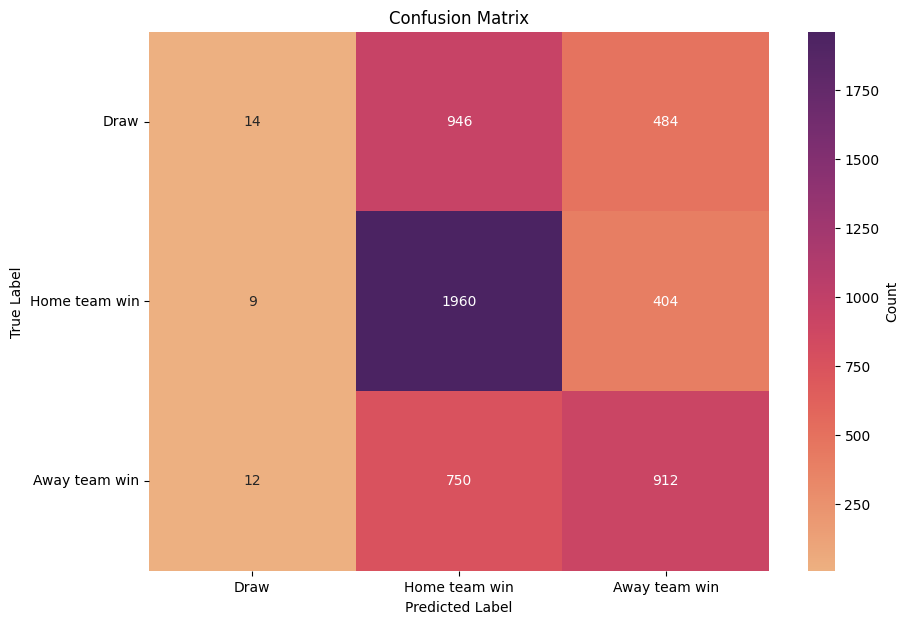

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='flare', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Draw', 'Home team win', 'Away team win'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Draw', 'Home team win', 'Away team win'], rotation=0)
plt.show()

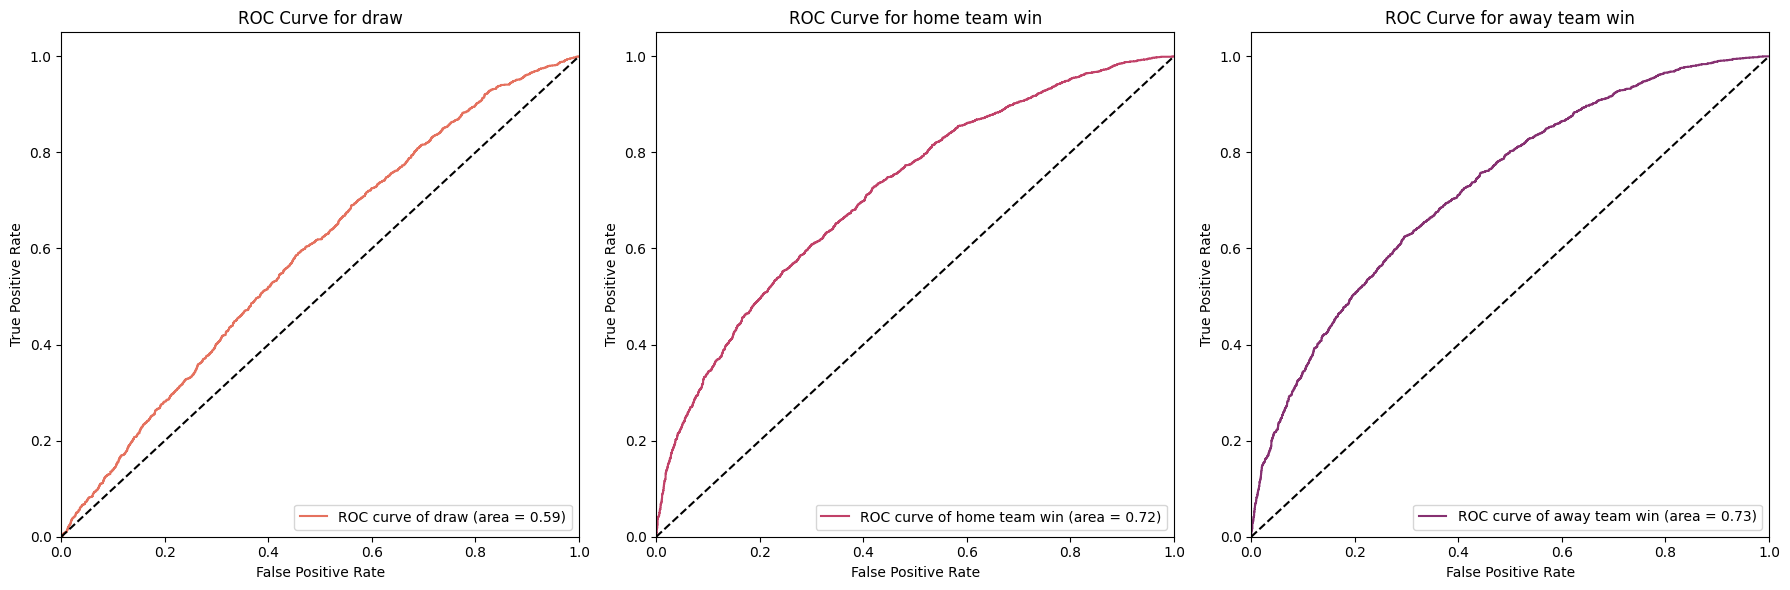

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Binarizacja etykiet
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Obliczenie krzywej ROC i AUC dla każdej klasy
fpr = dict()
tpr = dict()
roc_auc = dict()

# Definiowanie nazw klas i kolorów
class_names = ['draw', 'home team win', 'away team win']
colors = sns.color_palette("flare", n_colors=n_classes)

# Tworzenie figur i osi dla każdej klasy
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Ustawienie rozmiaru figury dla trzech subplotów

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Rysowanie każdego wykresu na osobnym subplot
    axes[i].plot(fpr[i], tpr[i], color=colors[i], label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:.2f})')
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve for {class_names[i]}')
    axes[i].legend(loc="lower right")

plt.tight_layout()  # Dostosowanie layoutu, aby etykiety nie nakładały się na inne elementy
plt.show()

In [29]:
len(selected_features)

23

In [30]:
importance_df.shape

(21, 2)

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_39344\1712622225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='flare')


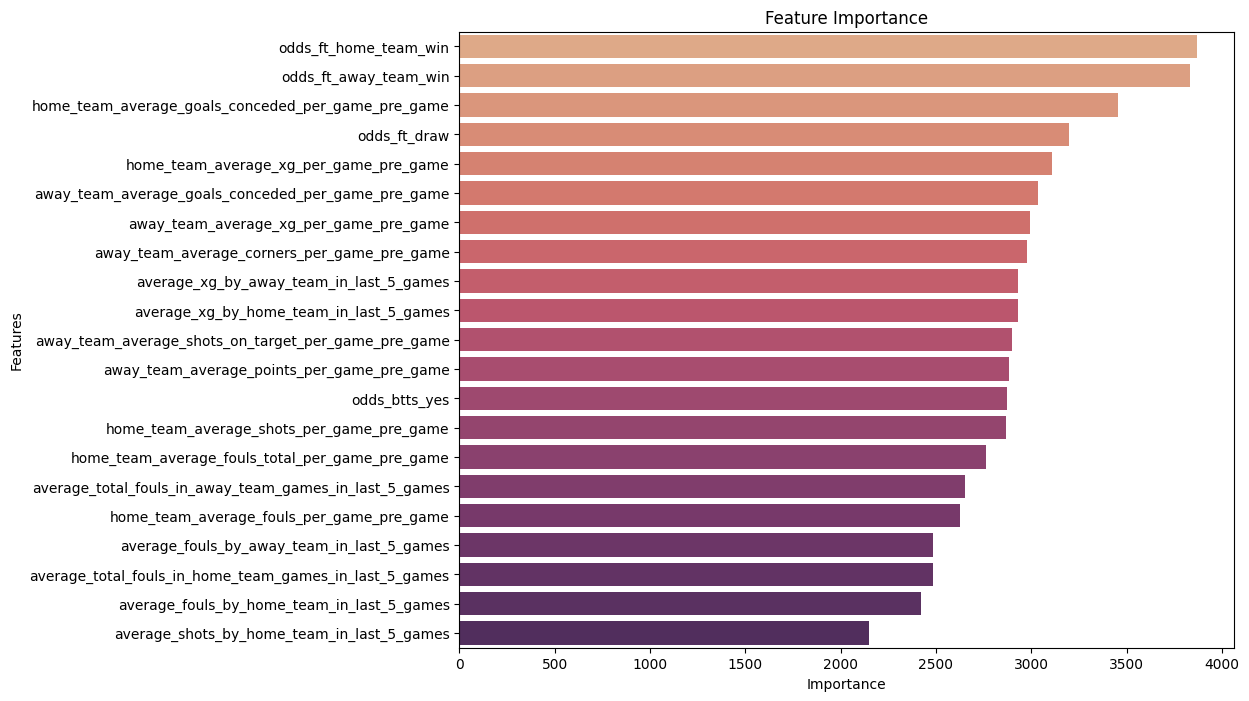

In [28]:
# Pobieranie ważności cech z modelu
importance = model.get_score(importance_type='weight')

# Konwersja na DataFrame do łatwiejszego plotowania
importance_df = pd.DataFrame({'Feature': list(importance.keys()), 'Importance': list(importance.values())})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Wykres ważności cech
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='flare')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [105]:
modelling_data

NameError: name 'modelling_data' is not defined

In [106]:
X_test

NameError: name 'X_test' is not defined

In [95]:
results_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'league': X_test['league']
})

In [97]:
league_groups = results_df.groupby('league')

In [104]:
results_list = []
for league, group in league_groups:
    acc = accuracy_score(group['y_test'], group['y_pred'])
    results_list.append({'league': league, 'accuracy': acc})

In [105]:
pd.set_option('display.float_format', lambda x: f'{x:.4f}')

In [106]:
results_df = pd.DataFrame(results_list)
results_df

,league,accuracy
0,austria,0.5179
1,belgium pro league,0.5449
2,bundesliga,0.5490
3,czech first league,0.5560
4,denmark,0.5233
5,ekstraklasa,0.4379
6,epl championship,0.4829
7,eredivisie,0.5761
8,greece,0.5625
9,la liga,0.5383


In [104]:
y_pred

NameError: name 'y_pred' is not defined

# Best model interpretability

In [68]:
X_test.dtypes

odds_ft_home_team_win                                     float64
odds_ft_away_team_win                                     float64
odds_ft_draw                                              float64
average_xg_by_home_team_in_last_5_games                   float64
home_team_average_xg_per_game_pre_game                    float64
away_team_average_goals_conceded_per_game_pre_game        float64
average_shots_by_home_team_in_last_5_games                float64
away_team_average_xg_per_game_pre_game                    float64
away_team_average_points_per_game_pre_game                float64
average_total_fouls_in_away_team_games_in_last_5_games    float64
average_fouls_by_away_team_in_last_5_games                float64
home_team_average_fouls_per_game_pre_game                 float64
home_team_average_fouls_total_per_game_pre_game           float64
home_team_average_shots_per_game_pre_game                 float64
away_team_average_corners_per_game_pre_game               float64
average_to

In [32]:
import shap

In [69]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [70]:
shap_values.shape

(5491, 21, 3)

In [73]:
for class_index in range(3):  # 3 klasy
    print(f"Wymiary shap_values dla klasy {class_index}: ", np.array(shap_values[class_index]).shape)

Wymiary shap_values dla klasy 0:  (21, 3)
Wymiary shap_values dla klasy 1:  (21, 3)
Wymiary shap_values dla klasy 2:  (21, 3)


In [78]:
for class_index in range(3):
    print(f"Summary plot dla klasy {class_index}")
    
    # Zakładając, że shap_values[class_index] ma dodatkowy wymiar dla biasu, spróbujmy go usunąć:
    shap_class_values = shap_values[class_index][:, :X_test.shape[1]]  # Dopasowanie do liczby cech w X_test
    
    shap.summary_plot(shap_class_values, X_test, max_display=20)

Summary plot dla klasy 0


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

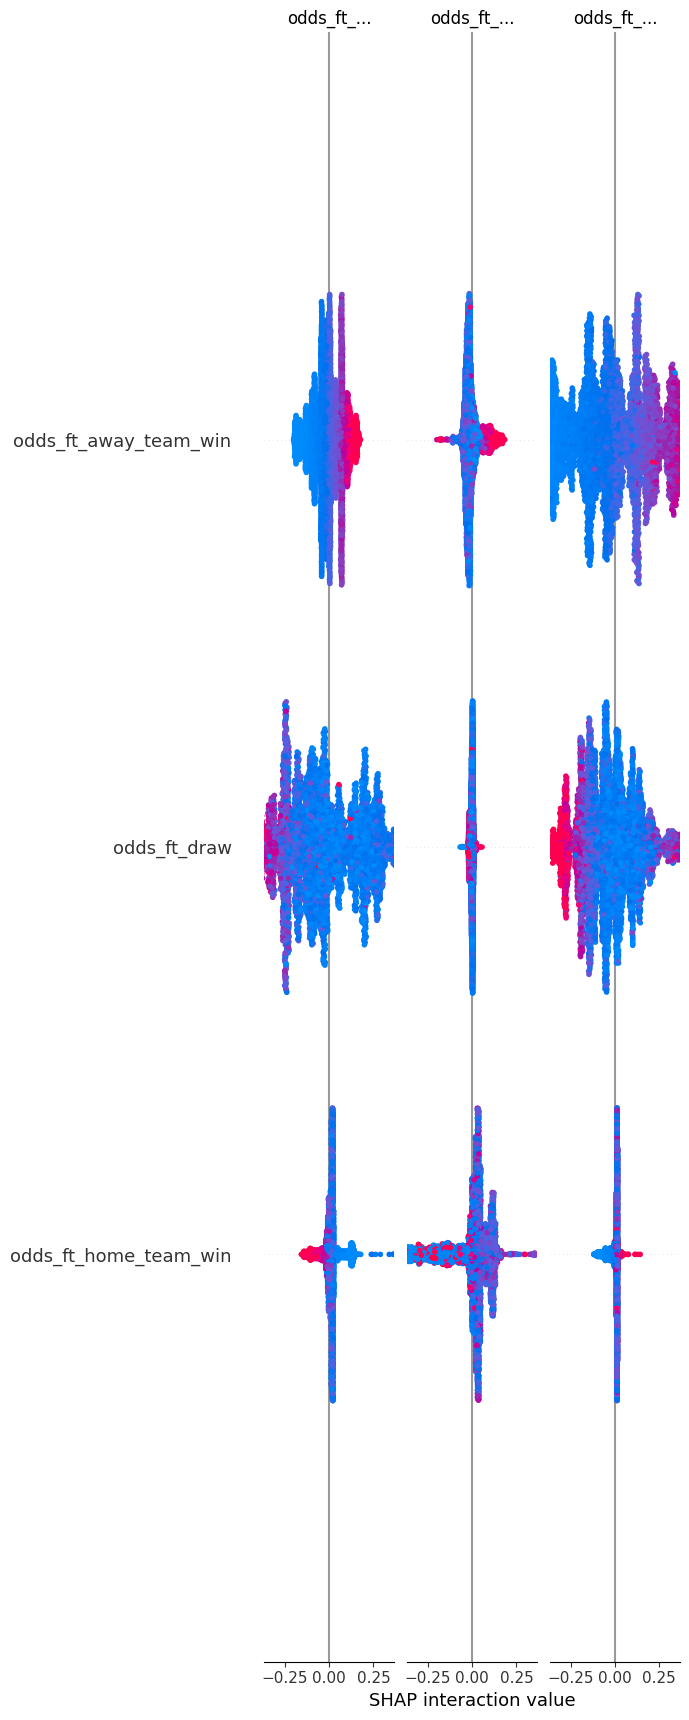

In [72]:
shap.summary_plot(shap_values, X_test, max_display=20)

In [48]:
print("SHAPE shap_values: ", shap_values.shape)
print("SHAPE X_test: ", X_test.shape)

SHAPE shap_values:  (5491, 21, 3)
SHAPE X_test:  (5491, 21)


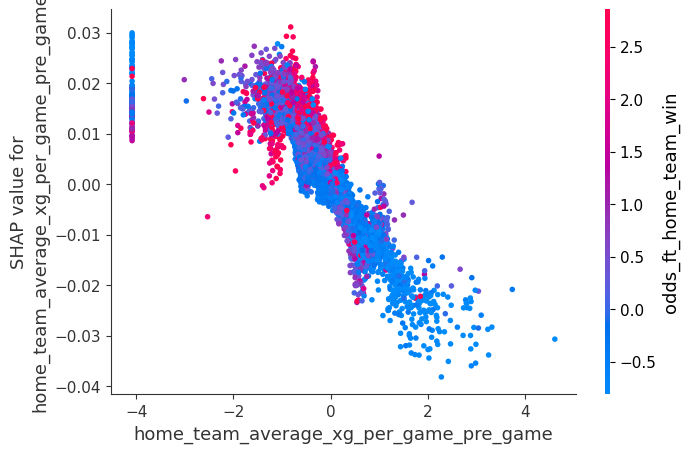

In [55]:
shap.dependence_plot(4, shap_values[..., 2], X_test, feature_names=X_test.columns)

In [47]:
for i in range(X_test.shape[1]):  # Przeiteruj przez każdą cechę
    shap.dependence_plot(i, shap_values, X_test, show=False)
    plt.title(f'Dependence plot for feature {X_test.columns[i]}')
    plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 50

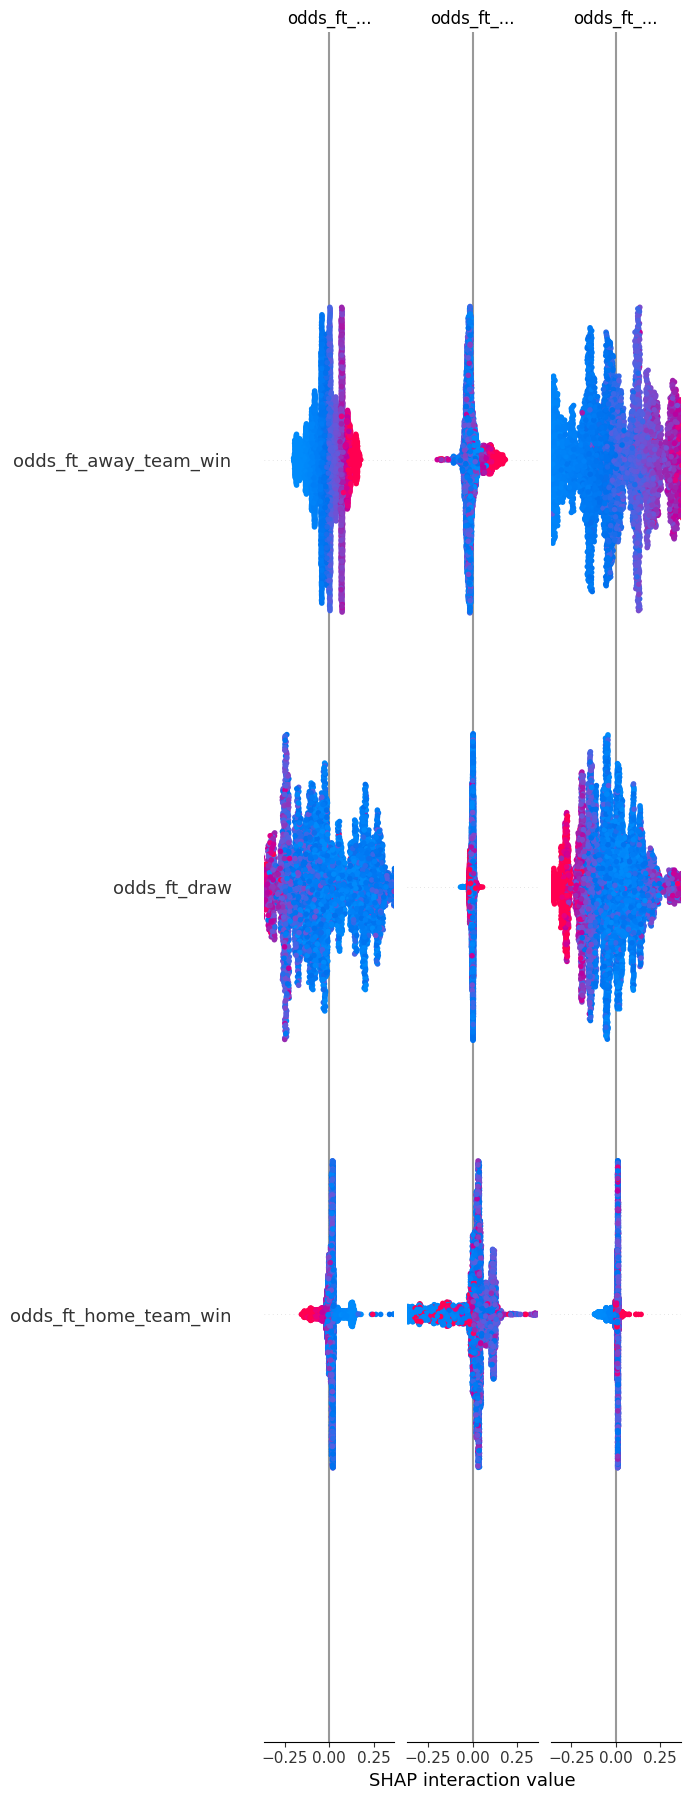

In [40]:
shap.summary_plot(shap_values, X_test, plot_type="dot", max_display=21)


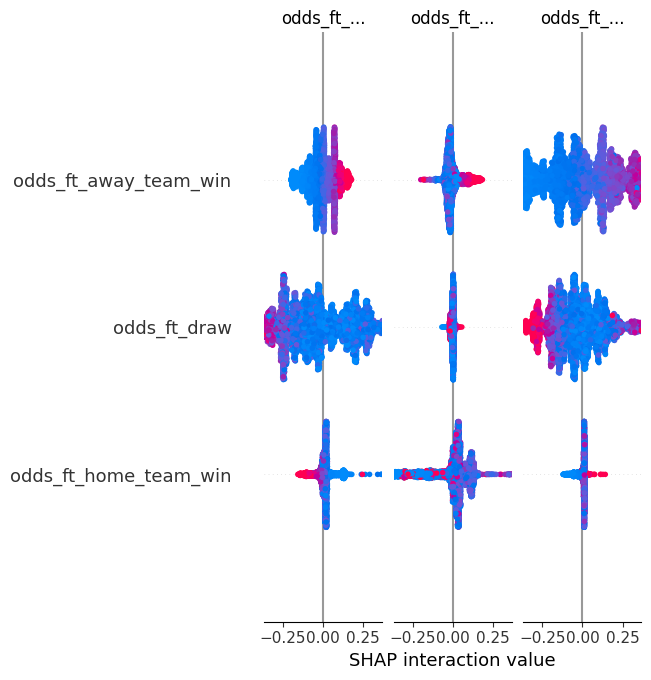

In [36]:
shap.summary_plot(shap_values, X_test)

In [37]:
shap.summary_plot(shap_values[0], X_test)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

# Score prediction (home_team_goal_count, away_team_goal_count)

### Feature selection

#### Home team features

In [4]:
home_team_features = [col for col in data.columns if 'home' in col and col != 'home_team_goal_count']

In [5]:
home_team_features

['home_team_cumulative_goals_scored_pre_game',
 'home_team_cumulative_goals_conceded_pre_game',
 'home_team_average_goals_scored_per_game_pre_game',
 'home_team_average_goals_conceded_per_game_pre_game',
 'home_team_average_first_half_goals_scored_pre_game',
 'home_team_average_second_half_goals_scored_pre_game',
 'home_team_average_first_half_goals_conceded_pre_game',
 'home_team_average_second_half_goals_conceded_pre_game',
 'home_team_average_first_half_goals_total_pre_game',
 'home_team_average_second_half_goals_total_pre_game',
 'home_team_average_corners_total_per_game_pre_game',
 'home_team_average_corners_per_game_pre_game',
 'home_team_average_yellow_cards_total_per_game_pre_game',
 'home_team_average_yellow_cards_per_game_pre_game',
 'home_team_cumulative_red_cards_pre_game',
 'home_team_average_red_cards_total_per_game_pre_game',
 'home_team_average_red_cards_per_game_pre_game',
 'home_team_average_shots_per_game_pre_game',
 'home_team_average_shots_on_target_per_game_pre_ga

In [6]:
features_for_correlation = [col for col in home_team_features if col != 'home_team_goal_count']
correlations_home_goals = data[features_for_correlation].corrwith(data['home_team_goal_count']).sort_values(ascending=False)

In [9]:
correlations_home_goals

home_team_average_goals_scored_per_game_pre_game            0.2133
home_team_average_points_per_game_pre_game                  0.1939
home_team_average_shots_on_target_per_game_pre_game         0.1878
home_team_average_second_half_goals_scored_pre_game         0.1833
home_team_average_second_half_goals_conceded_pre_game       0.1833
home_team_average_second_half_goals_total_pre_game          0.1833
home_team_average_goals_scored_in_last_5_games              0.1812
home_team_average_xg_per_game_pre_game                      0.1809
home_team_average_first_half_goals_total_pre_game           0.1727
home_team_average_first_half_goals_scored_pre_game          0.1727
average_xg_by_home_team_in_last_5_games                     0.1715
average_shots_on_target_by_home_team_in_last_5_games        0.1710
home_team_average_shots_per_game_pre_game                   0.1610
home_team_average_corners_per_game_pre_game                 0.1585
home_team_wins_in_last_5_games                              0.

In [10]:
significant_correlations_home_goals = correlations_home_goals[correlations_home_goals.abs() > 0.1]
significant_correlations_home_goals

home_team_average_goals_scored_per_game_pre_game         0.2133
home_team_average_points_per_game_pre_game               0.1939
home_team_average_shots_on_target_per_game_pre_game      0.1878
home_team_average_second_half_goals_scored_pre_game      0.1833
home_team_average_second_half_goals_conceded_pre_game    0.1833
home_team_average_second_half_goals_total_pre_game       0.1833
home_team_average_goals_scored_in_last_5_games           0.1812
home_team_average_xg_per_game_pre_game                   0.1809
home_team_average_first_half_goals_total_pre_game        0.1727
home_team_average_first_half_goals_scored_pre_game       0.1727
average_xg_by_home_team_in_last_5_games                  0.1715
average_shots_on_target_by_home_team_in_last_5_games     0.1710
home_team_average_shots_per_game_pre_game                0.1610
home_team_average_corners_per_game_pre_game              0.1585
home_team_wins_in_last_5_games                           0.1537
average_shots_by_home_team_in_last_5_gam

In [11]:
selected_features_home_goals = list(significant_correlations_home_goals.index)

#### Away team features

In [38]:
away_team_features = [col for col in data.columns if 'away' in col and col != 'away_team_goal_count']

In [39]:
away_team_features

['away_team_cumulative_goals_scored_pre_game',
 'away_team_cumulative_goals_conceded_pre_game',
 'away_team_average_goals_scored_per_game_pre_game',
 'away_team_average_goals_conceded_per_game_pre_game',
 'away_team_average_first_half_goals_scored_pre_game',
 'away_team_average_second_half_goals_scored_pre_game',
 'away_team_average_first_half_goals_conceded_pre_game',
 'away_team_average_second_half_goals_conceded_pre_game',
 'away_team_average_first_half_goals_total_pre_game',
 'away_team_average_second_half_goals_total_pre_game',
 'away_team_average_corners_total_per_game_pre_game',
 'away_team_average_corners_per_game_pre_game',
 'away_team_average_yellow_cards_total_per_game_pre_game',
 'away_team_average_yellow_cards_per_game_pre_game',
 'away_team_cumulative_red_cards_pre_game',
 'away_team_average_red_cards_total_per_game_pre_game',
 'away_team_average_red_cards_per_game_pre_game',
 'away_team_average_shots_per_game_pre_game',
 'away_team_average_shots_on_target_per_game_pre_ga

In [40]:
features_for_correlation = [col for col in away_team_features if col != 'away_team_goal_count']
correlations_away_goals = data[features_for_correlation].corrwith(data['away_team_goal_count']).sort_values(ascending=False)

In [41]:
correlations_away_goals

away_team_average_goals_scored_per_game_pre_game            0.1846
away_team_average_shots_on_target_per_game_pre_game         0.1663
away_team_average_points_per_game_pre_game                  0.1628
away_team_average_goals_scored_in_last_5_games              0.1581
away_team_average_first_half_goals_scored_pre_game          0.1571
away_team_average_first_half_goals_total_pre_game           0.1571
away_team_average_xg_per_game_pre_game                      0.1565
away_team_average_second_half_goals_conceded_pre_game       0.1531
away_team_average_second_half_goals_scored_pre_game         0.1531
away_team_average_second_half_goals_total_pre_game          0.1531
average_shots_on_target_by_away_team_in_last_5_games        0.1501
average_xg_by_away_team_in_last_5_games                     0.1484
away_team_average_shots_per_game_pre_game                   0.1429
away_team_wins_in_last_5_games                              0.1362
average_shots_by_away_team_in_last_5_games                  0.

In [42]:
significant_correlations_away_goals = correlations_away_goals[correlations_away_goals.abs() > 0.1]
significant_correlations_away_goals

away_team_average_goals_scored_per_game_pre_game         0.1846
away_team_average_shots_on_target_per_game_pre_game      0.1663
away_team_average_points_per_game_pre_game               0.1628
away_team_average_goals_scored_in_last_5_games           0.1581
away_team_average_first_half_goals_scored_pre_game       0.1571
away_team_average_first_half_goals_total_pre_game        0.1571
away_team_average_xg_per_game_pre_game                   0.1565
away_team_average_second_half_goals_conceded_pre_game    0.1531
away_team_average_second_half_goals_scored_pre_game      0.1531
away_team_average_second_half_goals_total_pre_game       0.1531
average_shots_on_target_by_away_team_in_last_5_games     0.1501
average_xg_by_away_team_in_last_5_games                  0.1484
away_team_average_shots_per_game_pre_game                0.1429
away_team_wins_in_last_5_games                           0.1362
average_shots_by_away_team_in_last_5_games               0.1339
away_team_average_corners_per_game_pre_g

In [43]:
selected_features_away_goals = list(significant_correlations_away_goals.index)

## Home team model

In [12]:
X_home = data[selected_features_home_goals + ['season']]

In [13]:
y_home = data['home_team_goal_count']

In [14]:
X_home.shape

(34369, 27)

In [15]:
num_features = X_home.select_dtypes(include='number').columns

In [16]:
X_home[num_features] = StandardScaler().fit_transform(X_home[num_features])

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\2649532679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_home[num_features] = StandardScaler().fit_transform(X_home[num_features])


In [17]:
data_home_goals = pd.concat([X_home, y_home], axis=1)

In [18]:
data_home_goals.shape

(34369, 28)

In [19]:
train_home_goals = data_home_goals[~data_home_goals['season'].isin(['23/24', '24/24'])]
test_home_goals = data_home_goals[data_home_goals['season'].isin(['23/24', '24/24'])]

In [20]:
train_home_goals.shape, test_home_goals.shape

((28878, 28), (5491, 28))

In [21]:
train_home_goals.head()

,home_team_average_goals_scored_per_game_pre_game,home_team_average_points_per_game_pre_game,home_team_average_shots_on_target_per_game_pre_game,home_team_average_second_half_goals_scored_pre_game,home_team_average_second_half_goals_conceded_pre_game,home_team_average_second_half_goals_total_pre_game,home_team_average_goals_scored_in_last_5_games,home_team_average_xg_per_game_pre_game,home_team_average_first_half_goals_total_pre_game,home_team_average_first_half_goals_scored_pre_game,average_xg_by_home_team_in_last_5_games,average_shots_on_target_by_home_team_in_last_5_games,home_team_average_shots_per_game_pre_game,home_team_average_corners_per_game_pre_game,home_team_wins_in_last_5_games,average_shots_by_home_team_in_last_5_games,home_team_cumulative_wins_pre_game,average_corners_by_home_team_in_last_5_games,home_team_cumulative_goals_scored_pre_game,home_team_average_possession_per_game_pre_game,h2h_home_team_wins_pre_game,average_ball_possession_by_home_team_in_last_5_games,home_team_cumulative_losses_pre_game,home_team_average_goals_conceded_per_game_pre_game,home_team_games_without_goals_pre_game,home_team_losses_in_last_5_games,season,home_team_goal_count
0,-2.2458,-2.1584,-3.4070,-1.9552,-1.9552,-1.9552,-1.8787,-3.8472,-1.7892,-1.7892,-3.5480,-3.0083,-3.5211,-3.3099,-1.3521,-3.1939,-1.2417,-2.7784,-1.3959,-4.6300,-0.8269,-4.4386,-1.3045,-2.4318,-1.2322,-1.4080,18/19,2
1,-2.2458,-2.1584,-3.4070,-1.9552,-1.9552,-1.9552,-1.8787,-3.8472,-1.7892,-1.7892,-3.5480,-3.0083,-3.5211,-3.3099,-1.3521,-3.1939,-1.2417,-2.7784,-1.3959,-4.6300,-0.8269,-4.4386,-1.3045,-2.4318,-1.2322,-1.4080,18/19,3
2,-2.2458,-2.1584,-3.4070,-1.9552,-1.9552,-1.9552,-1.8787,-3.8472,-1.7892,-1.7892,-3.5480,-3.0083,-3.5211,-3.3099,-1.3521,-3.1939,-1.2417,-2.7784,-1.3959,-4.6300,-0.8269,-4.4386,-1.3045,-2.4318,-1.2322,-1.4080,18/19,2
3,-2.2458,-2.1584,-3.4070,-1.9552,-1.9552,-1.9552,-1.8787,-3.8472,-1.7892,-1.7892,-3.5480,-3.0083,-3.5211,-3.3099,-1.3521,-3.1939,-1.2417,-2.7784,-1.3959,-4.6300,-0.8269,-4.4386,-1.3045,-2.4318,-1.2322,-1.4080,18/19,3
4,-2.2458,-2.1584,-3.4070,-1.9552,-1.9552,-1.9552,-1.8787,-3.8472,-1.7892,-1.7892,-3.5480,-3.0083,-3.5211,-3.3099,-1.3521,-3.1939,-1.2417,-2.7784,-1.3959,-4.6300,-0.8269,-4.4386,-1.3045,-2.4318,-1.2322,-1.4080,18/19,0


In [22]:
X_home_goals_train = train_home_goals.drop(['season', 'home_team_goal_count'], axis=1)
y_home_goals_train = train_home_goals['home_team_goal_count']

In [23]:
X_home_goals_test = test_home_goals.drop(['season', 'home_team_goal_count'], axis=1)
y_home_goals_test = test_home_goals['home_team_goal_count']

### XGBRegressor - hyperparameter tuning - home team goals

In [26]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

def objective_xgbr(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 10.0),
        'lambda': trial.suggest_float('lambda', 1e-5, 10.0)
    }
    
    model = XGBRegressor(**param, random_state=42)
    model.fit(X_home_goals_train, y_home_goals_train)
    preds = model.predict(X_home_goals_test)
    rmse = root_mean_squared_error(y_home_goals_test, preds)
    return rmse

In [27]:
study_xgbr_home_goals = optuna.create_study(direction='minimize')
study_xgbr_home_goals.optimize(objective_xgbr, n_trials=100)

print('Number of finished trials:', len(study_xgbr_home_goals.trials))
print('Best trial:', study_xgbr_home_goals.best_trial.params)

xgb_home_goals_best_rmse = study_xgbr_home_goals.best_value
xgb_home_goals_best_params = study_xgbr_home_goals.best_params

[I 2024-08-24 08:56:58,061] A new study created in memory with name: no-name-90aa2213-51ca-41b6-9717-1cd2b27f1957
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\3629353040.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
[I 2024-08-24 08:57:12,383] Trial 0 finished with value: 1.2523640436641128 and parameters: {'n_estimators': 378, 'max_depth': 13, 'learning_rate': 0.007722648097107161, 'subsample': 0.7018524876624043, 'colsample_bytree': 0.7560994229848577, 'alpha': 5.737047364313962, 'lambda': 9.25456553409685}. Best is trial 0 with value: 1.2523640436641128.
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\3629353040.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

Number of finished trials: 100
Best trial: {'n_estimators': 201, 'max_depth': 3, 'learning_rate': 0.026207067527785056, 'subsample': 0.8105610258868191, 'colsample_bytree': 0.8643327799114502, 'alpha': 0.5868567043561457, 'lambda': 5.152737332870524}


In [31]:
xgb_home_goals_best_rmse

1.2446783748056949

In [32]:
xgb_home_goals_best_params

{'n_estimators': 201,
 'max_depth': 3,
 'learning_rate': 0.026207067527785056,
 'subsample': 0.8105610258868191,
 'colsample_bytree': 0.8643327799114502,
 'alpha': 0.5868567043561457,
 'lambda': 5.152737332870524}

### CatboostRegressor - hyperparameter tuning - home_team_goals

In [29]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
        'od_type': 'Iter',
        'od_wait': 50
    }
    model = CatBoostRegressor(**params, verbose=False)
    model.fit(X_home_goals_train, y_home_goals_train, eval_set=[(X_home_goals_test, y_home_goals_test)], early_stopping_rounds=50)
    preds = model.predict(X_home_goals_test)
    rmse = root_mean_squared_error(y_home_goals_test, preds)
    return rmse

In [30]:
study_catboost_home_goals = optuna.create_study(direction='minimize')
study_catboost_home_goals.optimize(objective_catboost, n_trials=100)
print('Best CatBoost parameters:', study_catboost_home_goals.best_params)

catboost_home_goals_best_params = study_catboost_home_goals.best_params
catboost_home_goals_best_rmse = study_catboost_home_goals.best_value

[I 2024-08-24 09:08:14,498] A new study created in memory with name: no-name-0f3c8f26-2cf5-440f-9772-a4a1729d6d2a
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\1899330947.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\1899330947.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
[I 2024-08-24 09:08:39,695] Trial 0 finished with value: 1.2803938510557833 and parameters: {'iterations': 283, 'depth': 10, 'learning_rate': 0.0010496591144756478, 'random_stre

Best CatBoost parameters: {'iterations': 585, 'depth': 9, 'learning_rate': 0.011189193969307976, 'random_strength': 86, 'bagging_temperature': 0.07988376052163806}


In [33]:
catboost_home_goals_best_rmse

1.2435974077378562

### LGBMRegressor - hyperparameter tuning - home team goals

In [35]:
import lightgbm as lgb
from sklearn.metrics import root_mean_squared_error
import optuna

def objective_lgbmr(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_home_goals_train, y_home_goals_train)
    predictions = model.predict(X_home_goals_test)
    rmse = root_mean_squared_error(y_home_goals_test, predictions)
    return rmse

In [36]:
study_lgbmr_home_goals = optuna.create_study(direction='minimize')
study_lgbmr_home_goals.optimize(objective_lgbmr, n_trials=100)
print('Best CatBoost parameters:', study_lgbmr_home_goals.best_params)

lgbmr_home_goals_best_rmse = study_lgbmr_home_goals.best_value
lgbmr_home_goals_best_params = study_lgbmr_home_goals.best_params

[I 2024-08-24 09:29:58,024] A new study created in memory with name: no-name-60098df6-dfeb-47d3-bf0b-8f9812f60ebc
[I 2024-08-24 09:30:14,766] Trial 0 finished with value: 1.3330034652751934 and parameters: {'learning_rate': 0.038250037239645804, 'num_leaves': 170, 'subsample': 0.3158993213605233, 'colsample_bytree': 0.5477490566424763, 'min_data_in_leaf': 17}. Best is trial 0 with value: 1.3330034652751934.
[I 2024-08-24 09:30:38,532] Trial 1 finished with value: 1.3226311666180377 and parameters: {'learning_rate': 0.03925378120326363, 'num_leaves': 662, 'subsample': 0.5009537704346246, 'colsample_bytree': 0.3855435522742195, 'min_data_in_leaf': 36}. Best is trial 1 with value: 1.3226311666180377.
[I 2024-08-24 09:30:52,156] Trial 2 finished with value: 1.2998903331324345 and parameters: {'learning_rate': 0.039450546947932014, 'num_leaves': 724, 'subsample': 0.3261721540177251, 'colsample_bytree': 0.13134197484103366, 'min_data_in_leaf': 46}. Best is trial 2 with value: 1.2998903331324

Best CatBoost parameters: {'learning_rate': 0.004166902311093716, 'num_leaves': 14, 'subsample': 0.2327817628623926, 'colsample_bytree': 0.23358556170615433, 'min_data_in_leaf': 84}


In [37]:
lgbmr_home_goals_best_rmse

1.2452080838157507

## Away team model

In [44]:
X_away = data[selected_features_away_goals + ['season']]

In [45]:
y_away = data['away_team_goal_count']

In [46]:
num_features = X_away.select_dtypes(include='number').columns

In [47]:
X_away[num_features] = StandardScaler().fit_transform(X_away[num_features])

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\1043513663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_away[num_features] = StandardScaler().fit_transform(X_away[num_features])


In [48]:
data_away_goals = pd.concat([X_away, y_away], axis=1)

In [49]:
data_away_goals.shape

(34369, 28)

In [50]:
train_away_goals = data_away_goals[~data_away_goals['season'].isin(['23/24', '24/24'])]
test_away_goals = data_away_goals[data_away_goals['season'].isin(['23/24', '24/24'])]

In [51]:
train_away_goals.shape, test_away_goals.shape

((28878, 28), (5491, 28))

In [53]:
X_away_goals_train = train_away_goals.drop(['season', 'away_team_goal_count'], axis=1)
y_away_goals_train = train_away_goals['away_team_goal_count']

In [54]:
X_away_goals_test = test_away_goals.drop(['season', 'away_team_goal_count'], axis=1)
y_away_goals_test = test_away_goals['away_team_goal_count']

### XGBRegressor - hyperparameter tuning - away team goals

In [56]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

def objective_xgbr_away(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 10.0),
        'lambda': trial.suggest_float('lambda', 1e-5, 10.0)
    }
    
    model = XGBRegressor(**param, random_state=42)
    model.fit(X_away_goals_train, y_away_goals_train)
    preds = model.predict(X_away_goals_test)
    rmse = root_mean_squared_error(y_away_goals_test, preds)
    return rmse

In [57]:
study_xgbr_away_goals = optuna.create_study(direction='minimize')
study_xgbr_away_goals.optimize(objective_xgbr_away, n_trials=100)

print('Number of finished trials:', len(study_xgbr_away_goals.trials))
print('Best trial:', study_xgbr_away_goals.best_trial.params)

xgb_away_goals_best_rmse = study_xgbr_away_goals.best_value
xgb_away_goals_best_params = study_xgbr_away_goals.best_params

[I 2024-08-24 10:03:39,799] A new study created in memory with name: no-name-6b8822d2-082a-4673-8b52-40a68dbbb8d1
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\43959777.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
[I 2024-08-24 10:03:40,552] Trial 0 finished with value: 1.1714069299703547 and parameters: {'n_estimators': 160, 'max_depth': 6, 'learning_rate': 0.0002747019739045602, 'subsample': 0.9665719906258248, 'colsample_bytree': 0.6253560692428922, 'alpha': 5.199887344549732, 'lambda': 3.760554991436456}. Best is trial 0 with value: 1.1714069299703547.
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\43959777.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.co

Number of finished trials: 100
Best trial: {'n_estimators': 765, 'max_depth': 5, 'learning_rate': 0.004421355682326288, 'subsample': 0.6201629562566763, 'colsample_bytree': 0.9024828057009227, 'alpha': 3.008417089912343, 'lambda': 2.3187007556657195}


### CatBoostRegressor - hyperparameter tuning - away team goals

In [64]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective_catboost_away(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
        'od_type': 'Iter',
        'od_wait': 50
    }
    model = CatBoostRegressor(**params, verbose=False)
    model.fit(X_away_goals_train, y_away_goals_train, eval_set=[(X_away_goals_test, y_away_goals_test)], early_stopping_rounds=50)
    preds = model.predict(X_away_goals_test)
    rmse = root_mean_squared_error(y_away_goals_test, preds)
    return rmse

In [65]:
study_catboost_away_goals = optuna.create_study(direction='minimize')
study_catboost_away_goals.optimize(objective_catboost_away, n_trials=100)
print('Best CatBoost parameters:', study_catboost_away_goals.best_params)

catboost_away_goals_best_rmse = study_catboost_away_goals.best_value
catboost_away_goals_best_params = study_catboost_away_goals.best_params

[I 2024-08-24 10:14:07,545] A new study created in memory with name: no-name-d1603221-652a-4382-881c-e2811844bb7b
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\482094375.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_16344\482094375.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
[I 2024-08-24 10:14:36,662] Trial 0 finished with value: 1.1667181333108765 and parameters: {'iterations': 506, 'depth': 10, 'learning_rate': 0.00029525790761879864, 'random_stren

Best CatBoost parameters: {'iterations': 882, 'depth': 7, 'learning_rate': 0.07934606933711758, 'random_strength': 9, 'bagging_temperature': 0.17305450203022724}


In [111]:
catboost_home_goals_best_params

{'iterations': 585,
 'depth': 9,
 'learning_rate': 0.011189193969307976,
 'random_strength': 86,
 'bagging_temperature': 0.07988376052163806}

### LGBMRegressor - hyperparameter tuning - away team goals

In [66]:
import lightgbm as lgb
from sklearn.metrics import root_mean_squared_error
import optuna

def objective_lgbmr_away(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_away_goals_train, y_away_goals_train)
    predictions = model.predict(X_away_goals_test)
    rmse = root_mean_squared_error(y_away_goals_test, predictions)
    return rmse

In [67]:
study_lgbmr_away_goals = optuna.create_study(direction='minimize')
study_lgbmr_away_goals.optimize(objective_lgbmr_away, n_trials=100)
print('Best CatBoost parameters:', study_lgbmr_away_goals.best_params)

lgbm_away_goals_best_rmse = study_lgbmr_away_goals.best_value
lgbm_away_goals_best_params = study_lgbmr_away_goals.best_params

[I 2024-08-24 10:21:48,996] A new study created in memory with name: no-name-ed2b5511-7f28-4424-a297-e8f0e69f08d3
[I 2024-08-24 10:21:54,431] Trial 0 finished with value: 1.132925712796218 and parameters: {'learning_rate': 0.0045712486936902, 'num_leaves': 45, 'subsample': 0.13268202304387106, 'colsample_bytree': 0.6089302675329265, 'min_data_in_leaf': 42}. Best is trial 0 with value: 1.132925712796218.
[I 2024-08-24 10:22:45,839] Trial 1 finished with value: 1.1359774904205377 and parameters: {'learning_rate': 0.0021844184584833, 'num_leaves': 450, 'subsample': 0.5799880568841754, 'colsample_bytree': 0.9337696997122349, 'min_data_in_leaf': 6}. Best is trial 0 with value: 1.132925712796218.
[I 2024-08-24 10:23:11,832] Trial 2 finished with value: 1.1470845191345818 and parameters: {'learning_rate': 0.009167319656737831, 'num_leaves': 429, 'subsample': 0.6242965745143805, 'colsample_bytree': 0.57637507129801, 'min_data_in_leaf': 65}. Best is trial 0 with value: 1.132925712796218.
[I 202

Best CatBoost parameters: {'learning_rate': 0.003143180018446479, 'num_leaves': 519, 'subsample': 0.15666513236327567, 'colsample_bytree': 0.4583239304031911, 'min_data_in_leaf': 100}


In [107]:
lgbm_away_goals_best_params

{'learning_rate': 0.003143180018446479,
 'num_leaves': 519,
 'subsample': 0.15666513236327567,
 'colsample_bytree': 0.4583239304031911,
 'min_data_in_leaf': 100}

## Selecting best model

In [59]:
#home team goals
pd.DataFrame({
    'xgboost regressor': xgb_home_goals_best_rmse,
    'catboost regressor': catboost_home_goals_best_rmse,
    'lightgbm regressor': lgbmr_home_goals_best_rmse
}, index=['rmse'])

,xgboost regressor,catboost regressor,lightgbm regressor
rmse,1.2447,1.2436,1.2452


In [69]:
#home team goals
pd.DataFrame({
    'xgboost regressor': xgb_away_goals_best_rmse,
    'catboost regressor': catboost_away_goals_best_rmse,
    'lightgbm regressor': lgbm_away_goals_best_rmse
}, index=['rmse'])

,xgboost regressor,catboost regressor,lightgbm regressor
rmse,1.1304,1.1287,1.1313


## Training and saving best models

In [77]:
best_model_home_goals = CatBoostRegressor(**catboost_home_goals_best_params)
best_model_home_goals.fit(X_home_goals_train, y_home_goals_train, eval_set=[(X_home_goals_test, y_home_goals_test)], early_stopping_rounds=50)

0:	learn: 1.2978061	test: 1.2989061	best: 1.2989061 (0)	total: 54.3ms	remaining: 31.7s
1:	learn: 1.2969251	test: 1.2980083	best: 1.2980083 (1)	total: 81.1ms	remaining: 23.6s
2:	learn: 1.2962298	test: 1.2973551	best: 1.2973551 (2)	total: 104ms	remaining: 20.3s
3:	learn: 1.2954883	test: 1.2966982	best: 1.2966982 (3)	total: 123ms	remaining: 17.9s
4:	learn: 1.2948212	test: 1.2960929	best: 1.2960929 (4)	total: 146ms	remaining: 17s
5:	learn: 1.2940445	test: 1.2953969	best: 1.2953969 (5)	total: 165ms	remaining: 16s
6:	learn: 1.2936203	test: 1.2948850	best: 1.2948850 (6)	total: 169ms	remaining: 14s
7:	learn: 1.2927663	test: 1.2940359	best: 1.2940359 (7)	total: 190ms	remaining: 13.7s
8:	learn: 1.2919701	test: 1.2932836	best: 1.2932836 (8)	total: 212ms	remaining: 13.5s
9:	learn: 1.2911016	test: 1.2925513	best: 1.2925513 (9)	total: 234ms	remaining: 13.5s
10:	learn: 1.2903268	test: 1.2917785	best: 1.2917785 (10)	total: 259ms	remaining: 13.5s
11:	learn: 1.2896020	test: 1.2909595	best: 1.2909595 (11

In [78]:
import joblib
joblib.dump(best_model_home_goals, 'pretrains/catboost_r_home_model.pkl')

['pretrains/catboost_r_home_model.pkl']

In [79]:
best_model_away_goals = CatBoostRegressor(**catboost_away_goalsbest_params)
best_model_away_goals.fit(X_away_goals_train, y_away_goals_train, eval_set=[(X_away_goals_test, y_away_goals_test)], early_stopping_rounds=50)

0:	learn: 1.1474190	test: 1.1692282	best: 1.1692282 (0)	total: 12.2ms	remaining: 10.8s
1:	learn: 1.1440599	test: 1.1657866	best: 1.1657866 (1)	total: 22.1ms	remaining: 9.73s
2:	learn: 1.1405501	test: 1.1619324	best: 1.1619324 (2)	total: 33ms	remaining: 9.67s
3:	learn: 1.1375448	test: 1.1590634	best: 1.1590634 (3)	total: 42.3ms	remaining: 9.29s
4:	learn: 1.1348906	test: 1.1558398	best: 1.1558398 (4)	total: 54.2ms	remaining: 9.51s
5:	learn: 1.1327545	test: 1.1530492	best: 1.1530492 (5)	total: 65.8ms	remaining: 9.61s
6:	learn: 1.1306399	test: 1.1507783	best: 1.1507783 (6)	total: 76ms	remaining: 9.51s
7:	learn: 1.1293199	test: 1.1490405	best: 1.1490405 (7)	total: 87.2ms	remaining: 9.52s
8:	learn: 1.1277898	test: 1.1477058	best: 1.1477058 (8)	total: 96.3ms	remaining: 9.34s
9:	learn: 1.1264630	test: 1.1460006	best: 1.1460006 (9)	total: 105ms	remaining: 9.14s
10:	learn: 1.1250838	test: 1.1443558	best: 1.1443558 (10)	total: 114ms	remaining: 9.06s
11:	learn: 1.1239443	test: 1.1431333	best: 1.14

In [80]:
joblib.dump(best_model_away_goals, 'pretrains/catboost_r_away_model.pkl')

['pretrains/catboost_r_away_model.pkl']

## Loading pretrained models

In [81]:
from scipy.stats import poisson

In [82]:
home_goals_model = joblib.load(r'pretrains/catboost_r_home_model.pkl')
away_goals_model = joblib.load(r'pretrains/catboost_r_away_model.pkl')

In [83]:
home_goals_expected = home_goals_model.predict(X_home_goals_test)
away_goals_expected = away_goals_model.predict(X_away_goals_test)

In [87]:
import numpy as np
from scipy.stats import poisson

max_goals = 9
num_matches = len(home_goals_expected)
score_matrix = np.zeros((num_matches, max_goals+1, max_goals+1))

for match_index in tqdm(range(num_matches)):
    for i in range(max_goals+1):
        for j in range(max_goals+1):
            home_prob = poisson.pmf(i, home_goals_expected[match_index])
            away_prob = poisson.pmf(j, away_goals_expected[match_index])
            score_matrix[match_index][i][j] = home_prob * away_prob


100%|██████████| 5491/5491 [01:57<00:00, 46.65it/s]


In [89]:
score_matrix.shape

(5491, 10, 10)

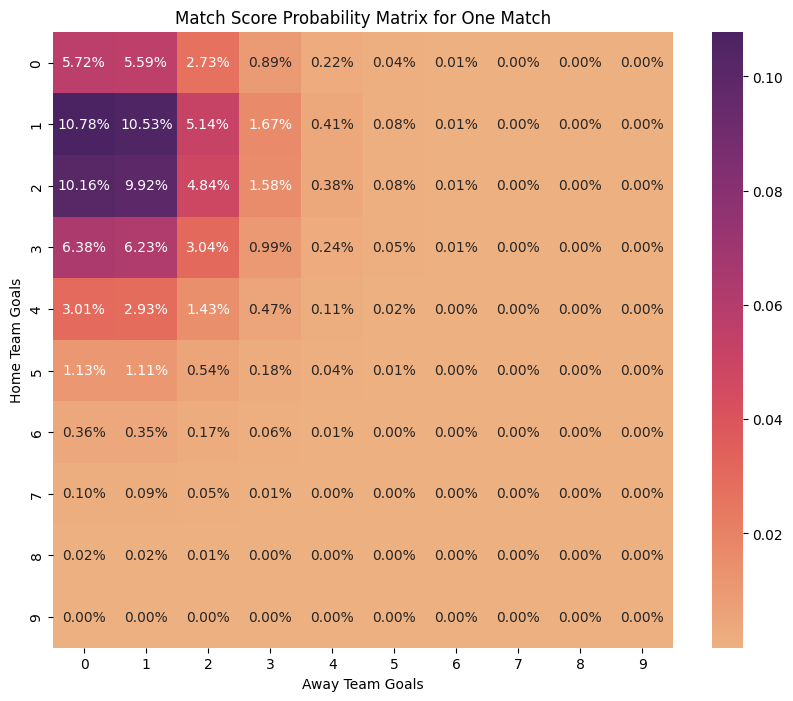

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(score_matrix[20], annot=True, fmt=".2%", cmap='flare')
plt.title('Match Score Probability Matrix for One Match')
plt.xlabel('Away Team Goals')
plt.ylabel('Home Team Goals')
plt.show()

In [96]:
from sklearn.metrics import log_loss

true_results = np.zeros(score_matrix.shape)
for idx, (home_goals, away_goals) in enumerate(zip(y_home_goals_test, y_away_goals_test)):
    home_goals = min(home_goals, max_goals)
    away_goals = min(away_goals, max_goals)
    true_results[idx, home_goals, away_goals] = 1

flat_predictions = score_matrix.reshape(-1)
flat_true_results = true_results.reshape(-1)

loss = log_loss(flat_true_results, flat_predictions)
print("Log Loss:", loss)

Log Loss: 0.03939589209546869


In [97]:
from sklearn.metrics import brier_score_loss
brier_scores = []
for idx, (home_goals, away_goals) in enumerate(zip(y_home_goals_test, y_away_goals_test)):
    home_goals = min(home_goals, max_goals)
    away_goals = min(away_goals, max_goals)
    predicted_probs = score_matrix[idx].flatten()
    true_probs = np.zeros_like(predicted_probs)
    true_probs[home_goals * (max_goals + 1) + away_goals] = 1
    brier_scores.append(brier_score_loss(true_probs, predicted_probs))

average_brier_score = np.mean(brier_scores)
print("Average Brier Score:", average_brier_score)


Average Brier Score: 0.009338086443446272


In [98]:
def rank_probability_score(true_scores, predicted_scores):
    rps = []
    for true, pred in zip(true_scores, predicted_scores):
        cumulative_true = np.cumsum(true)
        cumulative_pred = np.cumsum(pred)
        rps.append(np.sum((cumulative_pred - cumulative_true) ** 2))
    return np.mean(rps)

# Wywołanie funkcji RPS
rps_score = rank_probability_score(true_results.reshape(num_matches, -1),
                                   score_matrix.reshape(num_matches, -1))
print("Rank Probability Score:", rps_score)

Rank Probability Score: 6.82810222037503


In [99]:
predicted_most_likely = np.argmax(score_matrix.reshape(num_matches, -1), axis=1)
actual_results = y_home_goals_test * (max_goals + 1) + y_away_goals_test
correct_predictions = np.sum(predicted_most_likely == actual_results)
accuracy = correct_predictions / num_matches
print(f"Dokładność trafienia wyników: {accuracy:.2%}")

Dokładność trafienia wyników: 12.57%


# Betting simulation

In [119]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5491 entries, 945 to 34368
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   odds_ft_home_team_win                                   5491 non-null   float64
 1   odds_ft_away_team_win                                   5491 non-null   float64
 2   odds_ft_draw                                            5491 non-null   float64
 3   average_xg_by_home_team_in_last_5_games                 5491 non-null   float64
 4   home_team_average_xg_per_game_pre_game                  5491 non-null   float64
 5   away_team_average_goals_conceded_per_game_pre_game      5491 non-null   float64
 6   average_shots_by_home_team_in_last_5_games              5491 non-null   float64
 7   away_team_average_xg_per_game_pre_game                  5491 non-null   float64
 8   away_team_average_points_per_game_pre_ga

In [128]:
import random
import numpy as np
import pandas as pd
from tqdm import tqdm

# Zakładamy, że masz już DataFrame 'df' z danymi meczów oraz Series 'results' z rzeczywistymi wynikami

# Parametry symulacji
initial_budget = 1000  # Początkowy budżet
bet_amount = 100  # Kwota zakładu
num_simulations = 10000  # Liczba symulacji
days_per_simulation = 30  # Liczba dni na symulację
matches_per_day = 5  # Liczba spotkań na dzień

# Funkcja symulacji
def random_betting_simulation(df, results, initial_budget, bet_amount, days_per_simulation, matches_per_day, num_simulations):
    outcomes = []
    dates = sorted(df['date'].unique())  # Wszystkie unikalne daty

    for sim in tqdm(range(num_simulations)):
        # Losuj 30 dni, ale w porządku chronologicznym
        random_start_idx = random.randint(0, len(dates) - days_per_simulation)
        selected_days = dates[random_start_idx:random_start_idx + days_per_simulation]

        budget = initial_budget

        for current_date in selected_days:
            daily_matches = df[df['date'] == current_date]

            # Jeżeli w danym dniu jest mniej meczów niż potrzebne, to pomiń dzień
            if len(daily_matches) < matches_per_day:
                continue

            # Losowy wybór meczów na dany dzień
            selected_matches = daily_matches.sample(matches_per_day)

            # Przeprowadź zakłady
            for idx, row in selected_matches.iterrows():
                predicted = row[['odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']].idxmax()
                actual = results.loc[idx]

                # Konwertuj nazwy na wynik: 1 - home win, 0 - draw, 2 - away win
                if predicted == 'odds_ft_home_team_win':
                    predicted_result = 1
                elif predicted == 'odds_ft_draw':
                    predicted_result = 0
                else:
                    predicted_result = 2

                # Sprawdź wynik zakładu
                if predicted_result == actual:
                    if predicted_result == 1:
                        budget += bet_amount * row['odds_ft_home_team_win']
                    elif predicted_result == 0:
                        budget += bet_amount * row['odds_ft_draw']
                    else:
                        budget += bet_amount * row['odds_ft_away_team_win']
                else:
                    budget -= bet_amount

        # Zapisz wynik symulacji
        outcomes.append(budget)

    return outcomes

# Przykład wywołania funkcji
outcomes = random_betting_simulation(X_test, y_test, initial_budget, bet_amount, days_per_simulation, matches_per_day, num_simulations)

# Analiza wyników
outcomes_df = pd.DataFrame(outcomes, columns=['Final Budget'])

# Wyświetlenie statystyk
print(outcomes_df.describe())

# Sprawdzenie ile razy budżet wzrósł powyżej początkowego budżetu
num_wins = (outcomes_df['Final Budget'] > initial_budget).sum()
num_losses = (outcomes_df['Final Budget'] < initial_budget).sum()

print(f"Liczba symulacji z zyskiem: {num_wins}")
print(f"Liczba symulacji ze stratą: {num_losses}")

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [13:23<00:00, 12.44it/s]

       Final Budget
count    10000.0000
mean     -6420.6134
std       1003.8263
min      -9552.0513
25%      -7110.1735
50%      -6403.6562
75%      -5723.1088
max      -2801.7576
Liczba symulacji z zyskiem: 0
Liczba symulacji ze stratą: 10000


In [129]:
outcomes_df

,Final Budget
0,-4811.7016
1,-4504.1414
2,-6955.1671
3,-8341.5113
4,-6818.7956
...,...
9995,-6876.4654
9996,-6119.9456
9997,-4988.2852
9998,-5630.2758
